# Symulator kolejki M/M/C
## Projekt
Statystyka i teoria obsługi masowej.

Informatyka, stopień II, semestr I.

Grupa projektowa:
- Artur Bednarczyk

Repozytorium Github: [https://github.com/Isur/queue-simulator/](https://github.com/Isur/queue-simulator/)
## Teoria
### Notacja Kendala
Notacja zaproponowana przez Davida G. Kednalla w 1953 roku dotyczy opisów systemów kolejkowych. Wygląda ona w następujący sposób:

**A/B/c/L/N**, gdzie kolejne składowe oznaczają:
- A - rozkład zmiennej losowej określającej czas między kolejnymi zgłoszeniami
- B - rozkład zmiennej losowej określającej czas obsługi zgłoszenia
- c - liczba równoległych stanowisk obsługujących zgłoszenia
- L - bufor, rozmiar kolejki (domyślnie - nieskończona)
- N - wymiar źródła zgłoszeń (domyślnie - nieskończone) 

### M/M/C
Zgodnie z notacją Kendalla system kolejkowy M/M/C to system z czasem miedzy kolejnymi zgłoszeniami o rozkładzie wykładniczym, czasem obsługi zgłoszeń o rozkłądzie wykładniczym oraz `c` równoległych statowiskach obsługi. Kolejka nie jest ograniczona.
## Symulator
### Technologia
Symulacja systemu M/M/c została przygotowana w języku `Python`.
### Opis
Celem symulatora jest wykonanie dużej liczby symulacji kolejki. W tym celu została przygotowana klasa tworząca testy o losowych parametrach z wyznaczonego przedziału a następnie wykonująca symulacje wykorzystując wszystkie dostępne rdzenie procesora urządzenia na którym zostaje uruchomiona. W wyniku działania otrzymujemy plik o rozszerzeniu `.csv`, który zawiera wyniki z wszystkich symulacji. Kolejne kolumny to:
- Total Customers - liczba wszystkich zgłoszeń w systemie
- Serviced Customers - liczba obsłużonych zgłoszeń
- Not Serviced Customers - liczba nieobsłużonych zgłoszeń
- Service Mean Time - średni czas obsługi
- Service Rate - ustawione tempo obsługi
- Arrival Rate - ustawione tempo napływu zgłoszeń
- Servers Number - liczba stanowisk obsługi - serwerów
- Time Limit - limit czasowy
- Delay probability - obliczone prawdopodobieństwo opóźńienia
- System load - obliczone obciążenie systemu
- Average Customers - obliczona średnia liczba zgłoszeń w systemie
- Mean Service Time - obliczony średni czas obsługi
- Average Time In System - obliczony średni czas przebywania zgłoszenia w systemie

Wymienione kolumny to wyniki z symulacji komputerowej, ustawienia danej symulacji oraz wyniki z teoretycznego modelu dla danych ustawień.
Po za wynikiem ogólny zostaje również zapisane kilka całych procesów z symulacji. Wyniki takie zawierają ustawienia użyte w danej symulacji oraz cały przebieg procesu.
Wartości teoretyczne są obliczane tylko gdy dany process posiada stan stacjonarny. 
### Przykład użycia


In [1]:
from time import time
from main import Tester
tester = Tester(70000)
tester.prepare_tests()
start_time = time()
tester.run_multi_process()
end_time = time()
tester.print_results(end_time - start_time)

  0%|          | 0/70000 [00:00<?, ?it/s]

Number of tests: 70000
CPU Process number: 4
Number of tests processed by each process:
[17500, 17500, 17500, 17500]
Progress bar might by little jumpy cause of multiprocessing


  0%|          | 0/70000 [03:20<?, ?it/s], 474.41it/s]



Tested in 200.6144254207611s
Results saved to file '../results/results.csv'


Ustawienia są losowane dla każdego testu, tempo napływu oraz obsługi z przedziału 1 - 10, a liczba serwerów 2 - 5. Natomiast czas określony dla danego testu jest wzorem: `10 * (i % 10 + 1)`, gdzie `i` oznacza i-ty test.

Dla powyższego testu wyniki wyglądają następująco:

In [2]:
import pandas as pd

dataset = pd.read_csv("../results/result.csv", delimiter=";")
print("Kolumny:")
for col in dataset.columns:
    print(col, end=" | ")
print("\n\n")
print(dataset)

Kolumny:
Total Customers | Serviced Customers | Not Serviced Customers | Service Mean Time | Service Rate | Arrival Rate | Servers Number | Time Limit | Delay probability | System load | Average Customers | Mean Service Time | Average Time In System | 


       Total Customers  Serviced Customers  Not Serviced Customers  \
0                   69                  66                       3   
1                  106                 103                       3   
2                  254                 151                     103   
3                  328                 326                       2   
4                  336                 335                       1   
...                ...                 ...                     ...   
69995              364                 364                       0   
69996              446                 444                       2   
69997              450                 450                       0   
69998              754                 550   

In [3]:
process = pd.read_csv("../results/process-0.csv", delimiter=";")
print(process)

       Time    Event  Server id  Customer id  Customers in system
0    0.0000  ARRIVAL        NaN            0                    1
1    0.0000  SERVICE        1.0            0                    1
2    0.0407  ARRIVAL        NaN            1                    2
3    0.0407  SERVICE        0.0            1                    2
4    0.0767  ARRIVAL        NaN            2                    3
..      ...      ...        ...          ...                  ...
199  9.9558  SERVICE        1.0           66                    1
200  9.9854  ARRIVAL        NaN           67                    2
201  9.9854  SERVICE        3.0           67                    2
202  9.9972  ARRIVAL        NaN           68                    3
203  9.9972  SERVICE        2.0           68                    3

[204 rows x 5 columns]


In [4]:
with open("../results/process-0.txt", "r") as file:
    print(file.read())

Run with settings:
Service rate: 3.3645830548803
Arrival rate: 7.006476388924234
Number of servers: 4
Time limit: 10
  Time  Event      Server id    Customer id    Customers in system
------  -------  -----------  -------------  ---------------------
0       ARRIVAL                           0                      1
0       SERVICE            1              0                      1
0.0407  ARRIVAL                           1                      2
0.0407  SERVICE            0              1                      2
0.0767  ARRIVAL                           2                      3
0.0767  SERVICE            2              2                      3
0.0801  LEAVE              2              2                      2
0.1034  LEAVE              1              0                      1
0.1464  ARRIVAL                           3                      2
0.1464  SERVICE            1              3                      2
0.1701  ARRIVAL                           4                      3
0.1701  SERV

Przygotowany został również graficzny interpreter powyższych wyników. Plik `.csv` zawierający proces może zostać wykorzystany do wyświetlenia wykresu przedstawiającego cały proces oraz wykresu przedstawiającego liczbę zgłoszeń występującą w systemie oraz jak wiele razy taka liczba wystąpiła.

Run with settings:
Service rate: 3.3645830548803
Arrival rate: 7.006476388924234
Number of servers: 4
Time limit: 10



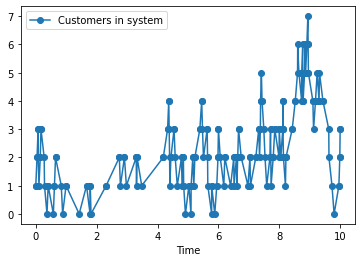

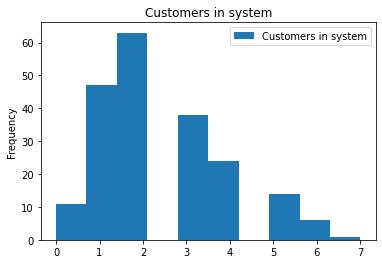

Run with settings:
Service rate: 4.195034336764493
Arrival rate: 4.156908095068401
Number of servers: 5
Time limit: 10



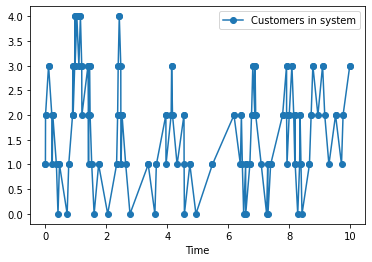

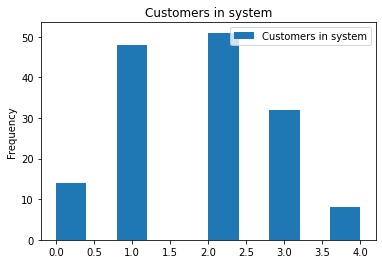

Run with settings:
Service rate: 4.870887283759883
Arrival rate: 4.986752793029941
Number of servers: 6
Time limit: 10



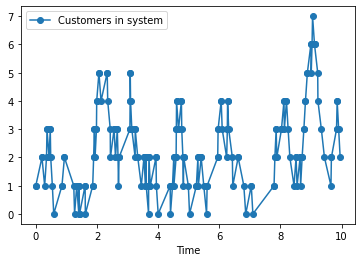

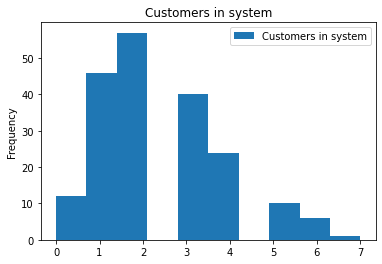

Run with settings:
Service rate: 7.563914456801248
Arrival rate: 4.429164690992775
Number of servers: 6
Time limit: 10



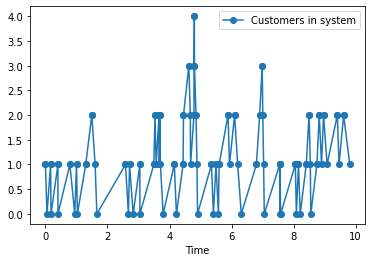

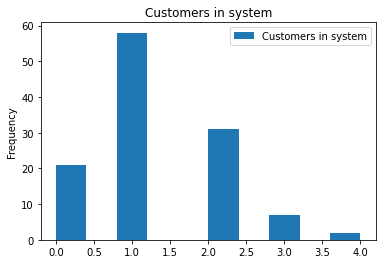

In [5]:
from resultAnalysis import Results
from matplotlib import pyplot as plt
import os

for i in range(os.cpu_count()): 
    Results().plot_process_from_file(f'../results/process-{i}')
    plt.show()

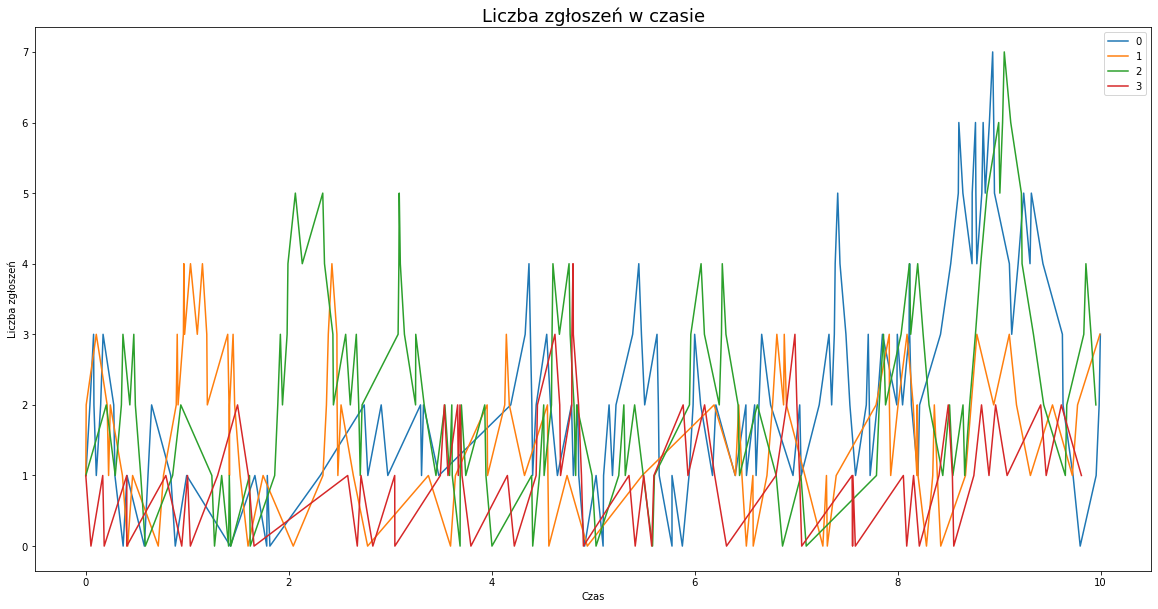

In [6]:
plt.figure(figsize=(20,10))
plt.title("Liczba zgłoszeń w czasie", fontsize=18)
for i in range(os.cpu_count()): 
    d = pd.read_csv(f"../results/process-{i}" + ".csv", delimiter=';')
    plt.plot(d['Time'], d['Customers in system'], label=i)
plt.xlabel("Czas")
plt.legend()
plt.ylabel("Liczba zgłoszeń")

plt.show()

## Wywołanie jednego testu

In [7]:
import time
from Simulator import MMC
from Utils import Utils
from CalcModel import CalcModel


start = time.time()
# service rate | arrival rate | servers | time limit
service_rate = 3
arrival_rate = 5
servers = 2
time_limit = 3

print(f"Ustawienia symulacji: \n Tempo obsługi: {service_rate} \n Tempo napływu: {arrival_rate} \n Liczba serwerów: {servers} \n Limit czasu: {time_limit}")
model = MMC([service_rate,arrival_rate,servers,time_limit])
total, serviced, not_serviced, mean, process = model.run(4)
print(f"Całkowita liczba zgłoszeń: {total}")
print(f"Obsłużone: {serviced}")
print(f"Nie obsłużone: {not_serviced}")
print(f"Średni czas obsługi: {mean}")
end = time.time()
print(f"Czas symulacji: {round(end - start, 4)}")
print("Proces:")
Utils.print_table(process, ["CZAS", "ZDARZENIE", "SERWER", "ZGŁOSZENIE", "LICZBA ZGŁOSZEŃ W SYSTEMIE"])
print("===========")
print("Matematyczny model dla tych ustawień")
print("===========")
model = CalcModel(service_rate,arrival_rate,servers,time_limit)
if model.system_load >= 1:
    print("Brak stanu stacjonarnego")
    print(f"Obiążenie: {model.system_load}")
else:
    print(f"Obciążenie: {model.system_load}")
    print(f"Prawdopodobieństwo wystąpienia 8 zgłoszeń: {model.probability_of_n_customers(8)}")
    print(f"Prawdopodobieństwo opóźnienia: {model.delay_probability()}")
    print(f"Średnia liczba zgłoszeń: {model.average_customers_in_queue()}")
    print(f"Średni czas w systemie = {model.average_time_in_system()}")
    print(f"Średni czas obsługi: {model.mean_service_time}")

Ustawienia symulacji: 
 Tempo obsługi: 3 
 Tempo napływu: 5 
 Liczba serwerów: 2 
 Limit czasu: 3
Całkowita liczba zgłoszeń: 16
Obsłużone: 14
Nie obsłużone: 2
Średni czas obsługi: 0.2941500835171434
Czas symulacji: 0.0195
Proces:
  CZAS  ZDARZENIE      SERWER    ZGŁOSZENIE    LICZBA ZGŁOSZEŃ W SYSTEMIE
------  -----------  --------  ------------  ----------------------------
0       ARRIVAL                           0                             1
0       SERVICE             0             0                             1
0.125   ARRIVAL                           1                             2
0.125   SERVICE             1             1                             2
0.1746  ARRIVAL                           2                             3
0.2108  LEAVE               1             1                             2
0.2109  SERVICE             1             2                             2
0.2651  LEAVE               0             0                             1
0.432   ARRIVAL               

## Analiza Statystyczna

In [8]:
print(f"Liczba wykonanych testów: {len(dataset)}")

Liczba wykonanych testów: 70000


### Przygotwanie danych
Sprawdzenie czy są braki w wartościach (brak stanu stacjonarnego). W przypadku wystąpienia braku, zostaną usunięte puste wiersze.

In [9]:
dataset['load'] = dataset['System load'].apply(lambda q: 'low' if q < 0.4 else 'medium' if q < 0.7 else 'high')

def show_nulls(dataset):
    Sum = dataset.isnull().sum()
    Percentage = (dataset.isnull().sum() / dataset.isnull().count())
    stat = pd.concat([Sum, Percentage], axis=1, keys=['Sum', 'Percentage'])
    print(stat)
    
show_nulls(dataset)

                         Sum  Percentage
Total Customers            0    0.000000
Serviced Customers         0    0.000000
Not Serviced Customers     0    0.000000
Service Mean Time          0    0.000000
Service Rate               0    0.000000
Arrival Rate               0    0.000000
Servers Number             0    0.000000
Time Limit                 0    0.000000
Delay probability       4758    0.067971
System load                0    0.000000
Average Customers       4758    0.067971
Mean Service Time          0    0.000000
Average Time In System  4758    0.067971
load                       0    0.000000


In [10]:
db_prepared = dataset.dropna()
    
show_nulls(db_prepared)

print(f"\nLiczba testów po eliminacji wybrakowanych: {len(db_prepared)}")

                        Sum  Percentage
Total Customers           0         0.0
Serviced Customers        0         0.0
Not Serviced Customers    0         0.0
Service Mean Time         0         0.0
Service Rate              0         0.0
Arrival Rate              0         0.0
Servers Number            0         0.0
Time Limit                0         0.0
Delay probability         0         0.0
System load               0         0.0
Average Customers         0         0.0
Mean Service Time         0         0.0
Average Time In System    0         0.0
load                      0         0.0

Liczba testów po eliminacji wybrakowanych: 65242


### Statystyki

In [11]:
db_prepared.mean()

Total Customers           381.162165
Serviced Customers        378.581726
Not Serviced Customers      2.580439
Service Mean Time           0.219242
Service Rate                5.157734
Arrival Rate                6.909623
Servers Number              4.118375
Time Limit                 55.005824
Delay probability           0.106291
System load                 0.407338
Average Customers           1.982784
Mean Service Time           0.220910
Average Time In System      0.285064
dtype: float64

In [12]:
db_prepared.describe()

Total Customers  Serviced Customers  Not Serviced Customers  \
count     65242.000000        65242.000000            65242.000000   
mean        381.162165          378.581726                2.580439   
std         226.163584          225.578325                5.481081   
min          24.000000           23.000000                0.000000   
25%         193.000000          190.000000                1.000000   
50%         358.000000          355.000000                1.000000   
75%         534.750000          532.000000                3.000000   
max        1078.000000         1073.000000              143.000000   

       Service Mean Time  Service Rate  Arrival Rate  Servers Number  \
count       65242.000000  65242.000000  65242.000000    65242.000000   
mean            0.219242      5.157734      6.909623        4.118375   
std             0.088442      1.680333      1.719683        1.378132   
min             0.078400      2.000060      4.000289        2.000000   
25%             0.150900      3.752939      5.422114        3.000000   
50%             0.191000      5.202938      6.858816        4.000000   
75%             0.263900      6.601152      8.382974        5.000000   
max             0.659500      7.999930      9.999980        6.000000   

         Time Limit  Delay probability   System load  Average Customers  \
count  65242.000000       65242.000000  65242.000000       65242.000000   
mean      55.005824           0.106291      0.407338           1.982784   
std       28.705577           0.121849      0.208630         292.883421   
min       10.000000           0.000016      0.084552           0.000001   
25%       30.000000           0.009267      0.241740           0.003036   
50%       60.000000           0.054498      0.359253           0.031212   
75%       80.000000           0.168593      0.535629           0.193298   
max      100.000000           0.499997      0.999993       74560.718797   

       Mean Service Time  Average Time In System  
count       65242.000000            6.524200e+04  
mean            0.220910            2.850643e-01  
std             0.088459            4.260299e+01  
min             0.125001            3.578865e-07  
25%             0.151489            4.589641e-04  
50%             0.192199            4.584229e-03  
75%             0.266458            2.819880e-02  
max             0.499985            1.082500e+04

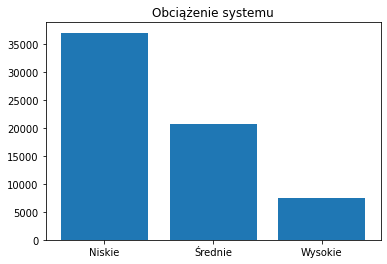

In [13]:
plt.bar(['Niskie', 'Średnie', 'Wysokie'], db_prepared.load.value_counts())
plt.title('Obciążenie systemu')
plt.show()

<BarContainer object of 5 artists>

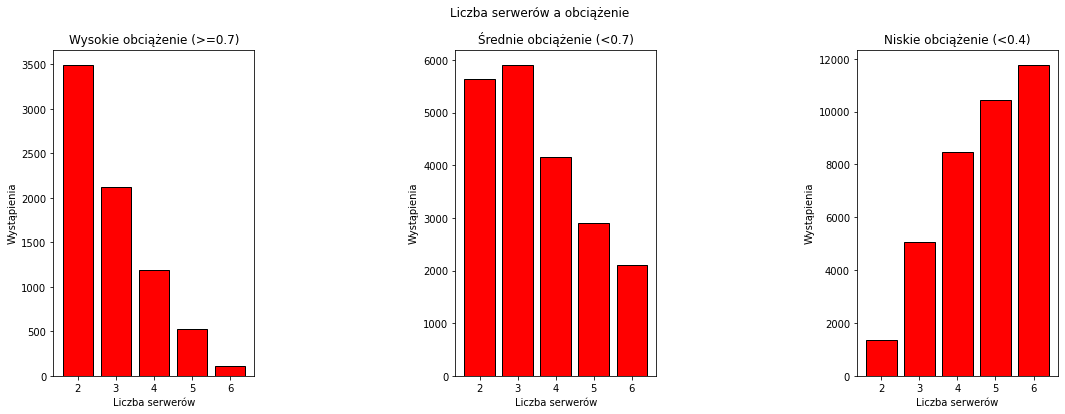

In [14]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle("Liczba serwerów a obciążenie")
fig.subplots_adjust(wspace=1)

ax[0].set_title("Wysokie obciążenie (>=0.7)")
ax[0].set_xlabel("Liczba serwerów")
ax[0].set_ylabel("Wystąpienia")
x = db_prepared['Servers Number'][db_prepared.load == 'high'].value_counts()
x = (list(x.index), list(x.values))
ax[0].bar(x[0], x[1], color='red', edgecolor='black')

ax[1].set_title("Średnie obciążenie (<0.7)")
ax[1].set_xlabel("Liczba serwerów")
ax[1].set_ylabel("Wystąpienia")
x = db_prepared['Servers Number'][db_prepared.load == 'medium'].value_counts()
x = (list(x.index), list(x.values))
ax[1].bar(x[0], x[1], color='red', edgecolor='black')

ax[2].set_title("Niskie obciążenie (<0.4)")
ax[2].set_xlabel("Liczba serwerów")
ax[2].set_ylabel("Wystąpienia")
x = db_prepared['Servers Number'][db_prepared.load == 'low'].value_counts()
x = (list(x.index), list(x.values))
ax[2].bar(x[0], x[1], color='red', edgecolor='black')

### Korelacje
Poniżej mapa oraz wykresy przedstawiające korelacje między zmiennymi.

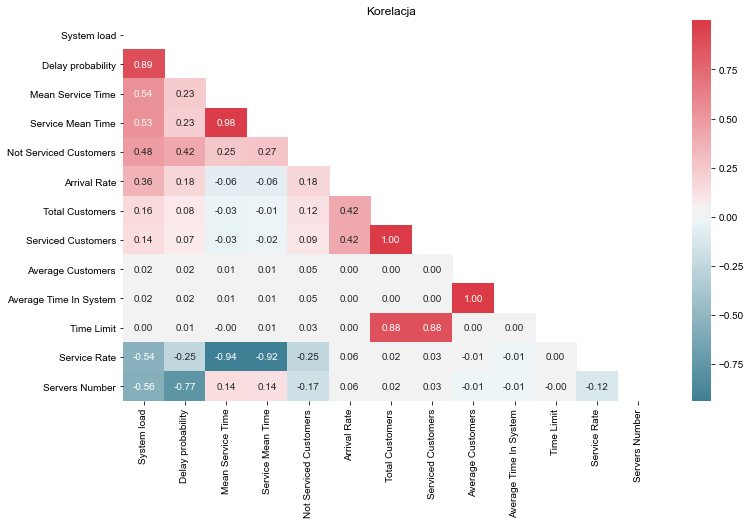

In [15]:
import numpy as np
import seaborn as sns

corr = db_prepared.corr()
top_corr_cols = corr['System load'].sort_values(ascending=False).keys()
top_corr = corr.loc[top_corr_cols, top_corr_cols]
drop_self = np.zeros_like(top_corr)
drop_self[np.triu_indices_from(drop_self)] = True
plt.figure(figsize=(12, 7))
plt.title("Korelacja")
sns.heatmap(top_corr, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True, fmt=".2f",
            mask=drop_self)
sns.set(font_scale=1.5)

Z **ustawień systemu** największy wpływ negatywny (mniejsza wartość) na obciążenie systemu ma `Servers Number`, czyli liczba serwerów, natomiast największy wpływ pozytywny ma tempo napływu.

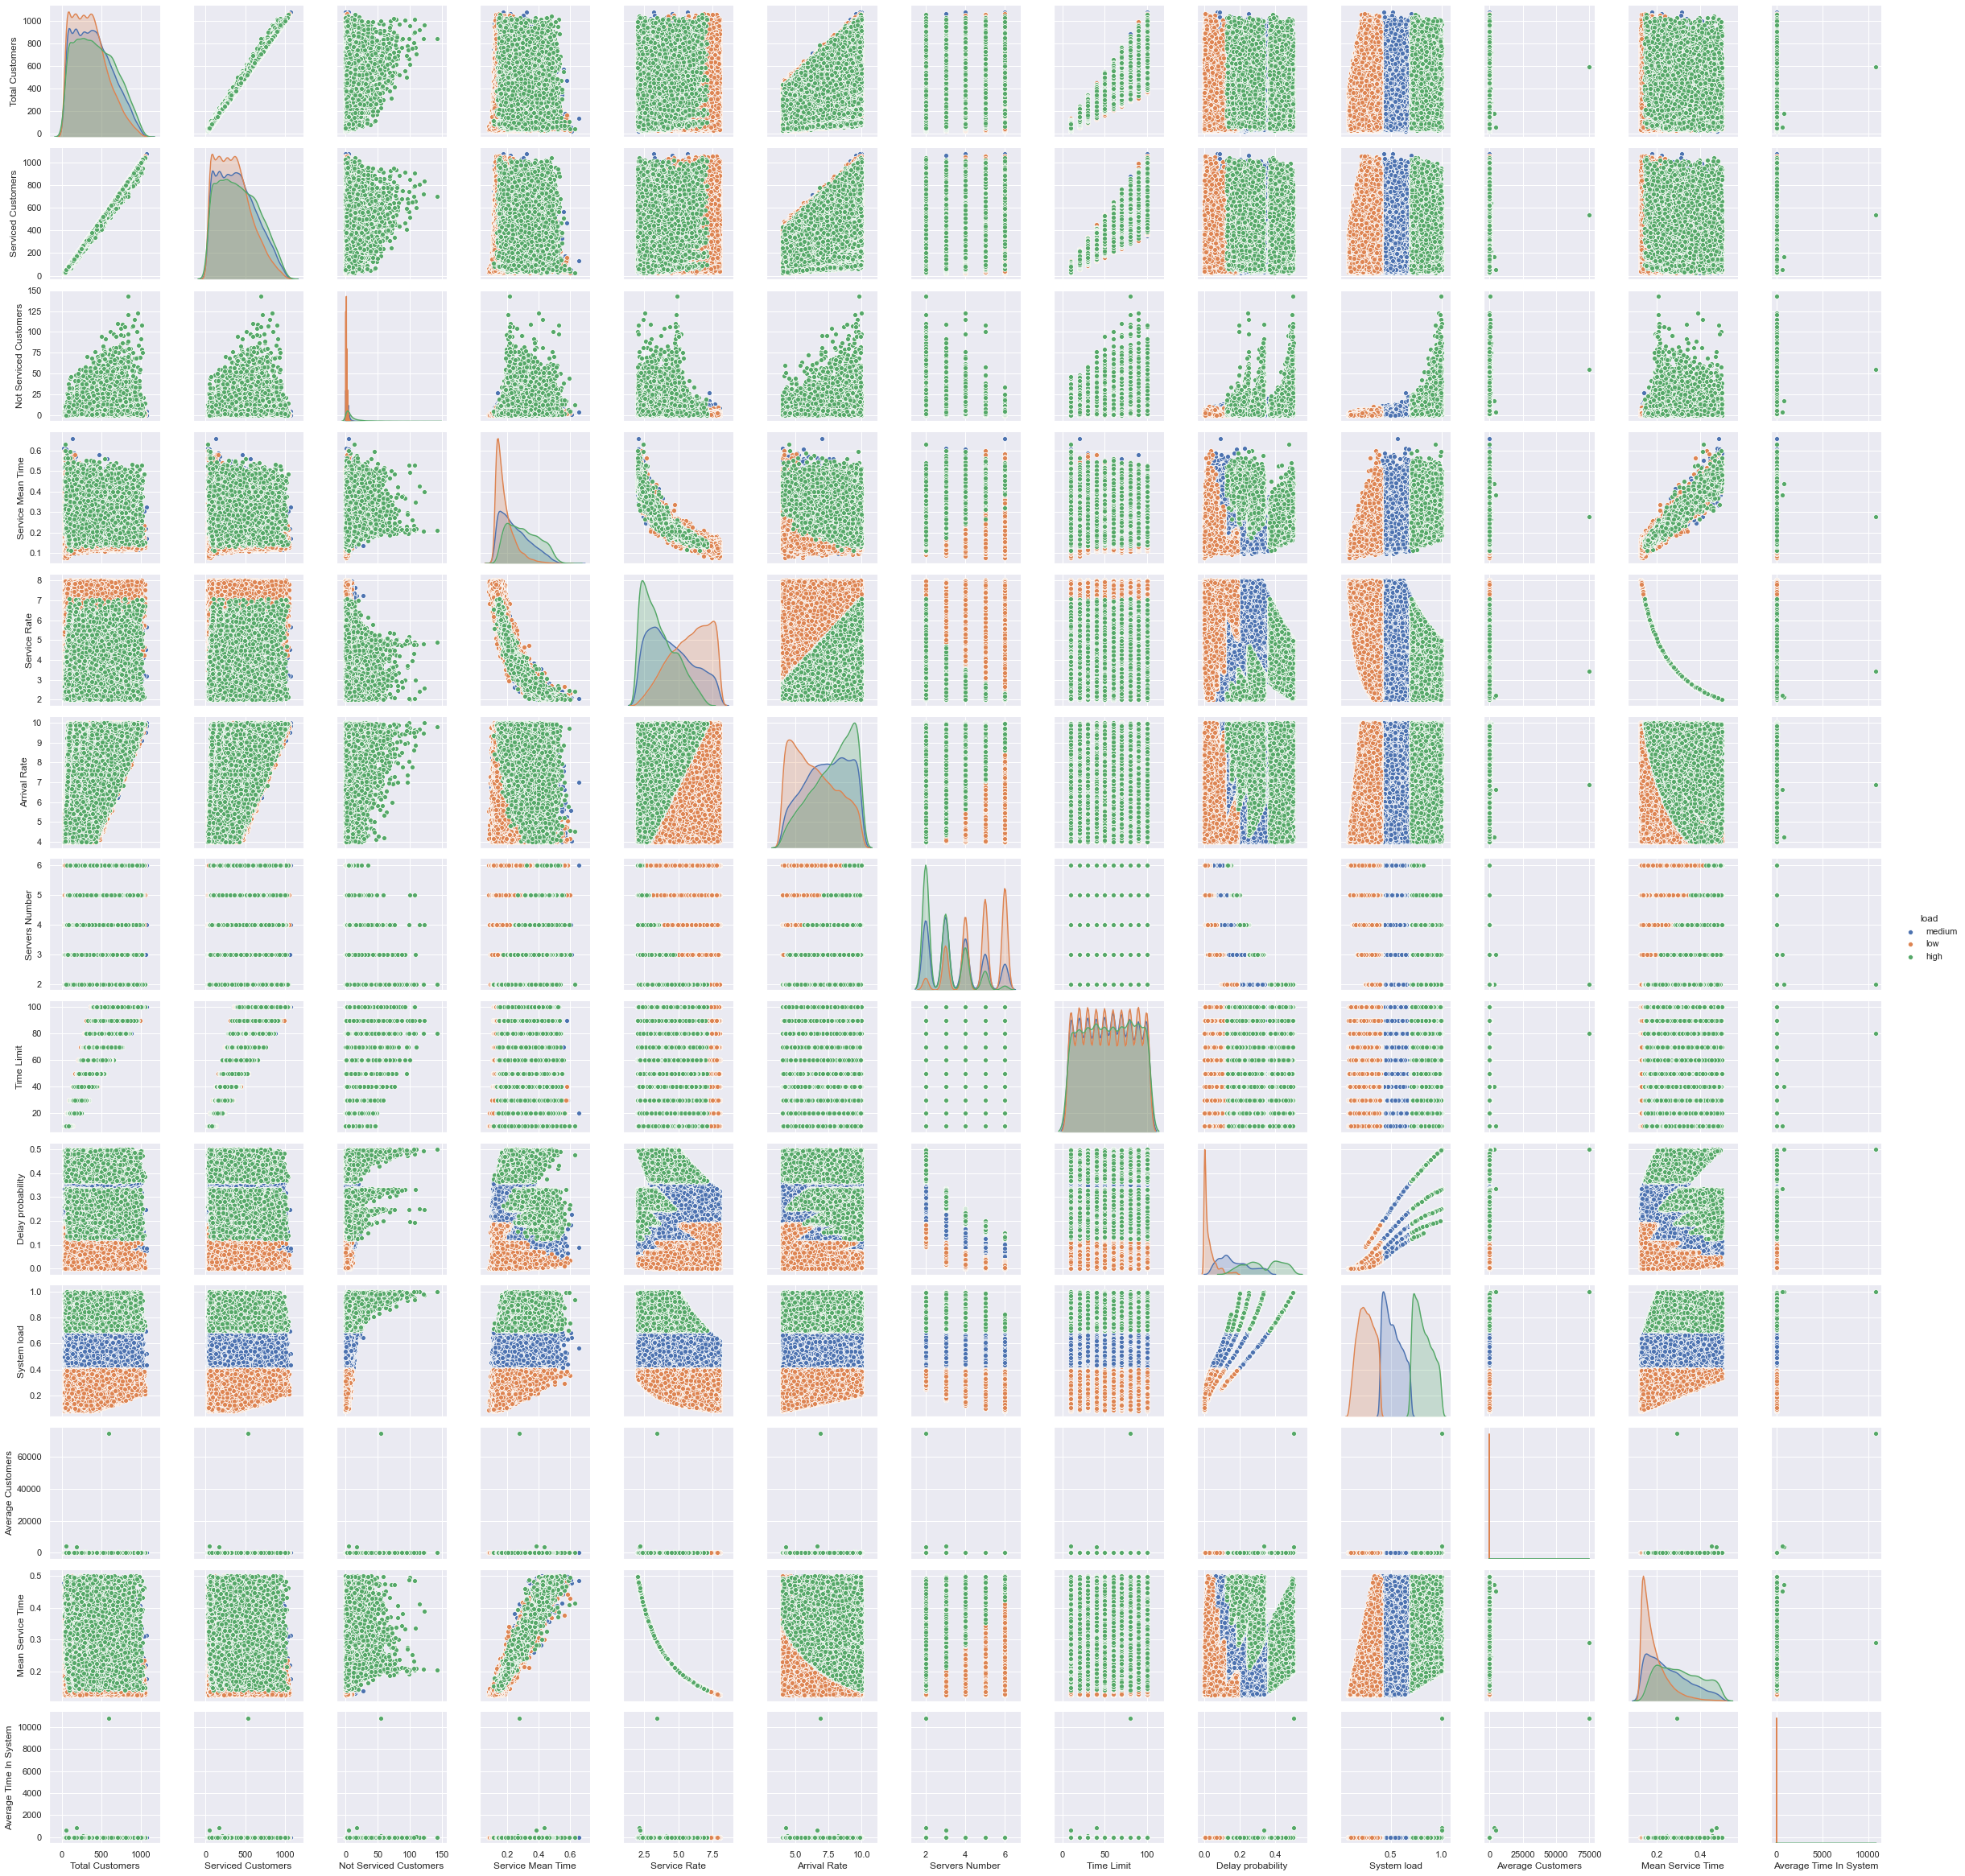

In [16]:
sns.set(font_scale=1.0)
cols = db_prepared.columns
g = sns.pairplot(data=db_prepared.loc[:, cols], hue='load')
fig = g.fig
fig.subplots_adjust(top=0.99, wspace=0.3)
plt.show()

### Obciążenie pry różnym tempie napływu i obsługi oraz liczbie serwerów

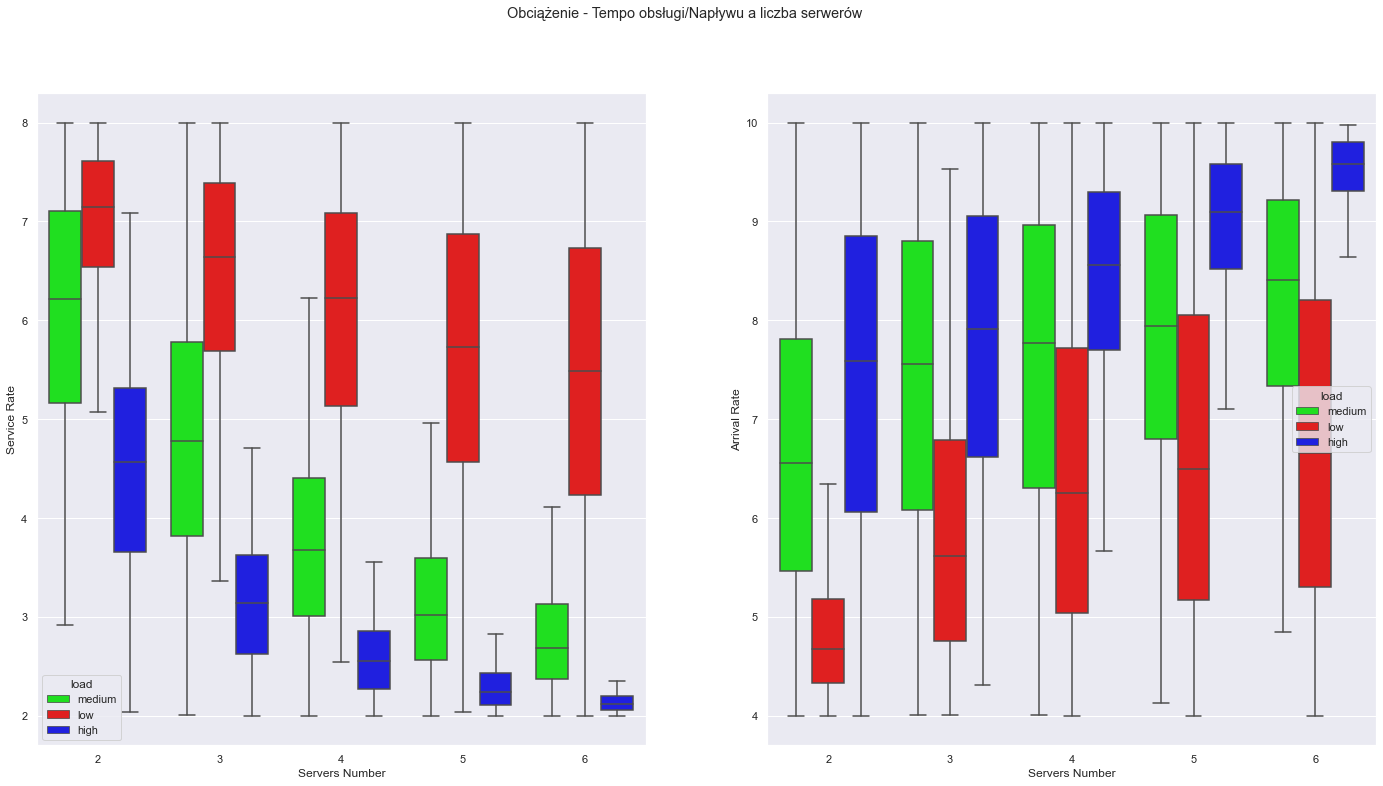

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(24,12))
fig.suptitle("Obciążenie - Tempo obsługi/Napływu a liczba serwerów")
sns.boxplot(y='Service Rate', x='Servers Number', hue='load', data=db_prepared, ax=ax[0],
            palette={'low': "#FF0000", 'medium': "#00FF00", 'high': "#0000FF"})
ax[0].set_ylabel("Service Rate")
ax[0].set_xlabel("Servers Number")
sns.boxplot(y='Arrival Rate', x='Servers Number', hue='load', data=db_prepared, ax=ax[1],
            palette={'low': "#FF0000", 'medium': "#00FF00", 'high': "#0000FF"})
ax[1].set_ylabel("Arrival Rate")
ax[1].set_xlabel("Servers Number")
plt.show()

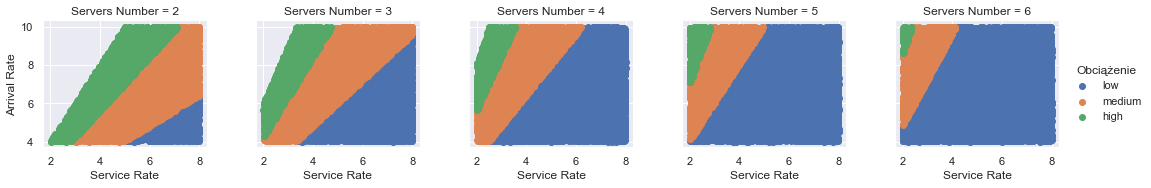

In [18]:
g = sns.FacetGrid(db_prepared, col='Servers Number', hue='load',
                  col_order=[i for i in range(2,7)], hue_order=['low', 'medium', 'high'])
g.map(plt.scatter, 'Service Rate', 'Arrival Rate')
fig = g.fig
fig.subplots_adjust(wspace=0.3, top=0.8)
fig.suptitle("")
g.add_legend(title='Obciążenie')

plt.show()

Jak widać na powyższych wykresach, im więcej serwerów tym więcej symulacji o niskim obciążeniu. Wyższe tempo napływu i niskie tempo obsługi to więszke obciążenie systemu.

### Różnica między modelem matematycznym a wynikiem symulacji - średni czas obłsugi

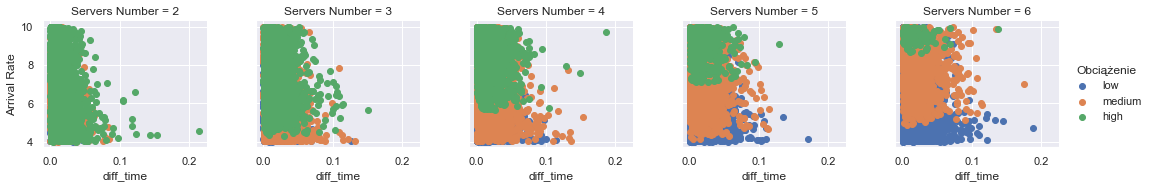

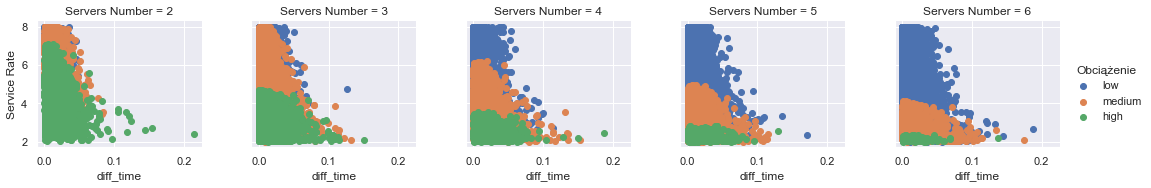

In [19]:
df = db_prepared.copy()
df['diff_time'] = abs(db_prepared['Service Mean Time'] - db_prepared['Mean Service Time'])
df['serviced_percent'] = (db_prepared['Serviced Customers'] / db_prepared['Total Customers']) * 100

g = sns.FacetGrid(df, col='Servers Number', hue='load',
                  col_order=[i for i in range(2,7)], hue_order=['low', 'medium', 'high'])
g.map(plt.scatter, 'diff_time', 'Arrival Rate')
fig = g.fig
fig.subplots_adjust(wspace=0.3, top=0.8)
fig.suptitle("")
g.add_legend(title='Obciążenie')

g = sns.FacetGrid(df, col='Servers Number', hue='load',
                  col_order=[i for i in range(2,7)], hue_order=['low', 'medium', 'high'])
g.map(plt.scatter, 'diff_time', 'Service Rate')
fig = g.fig
fig.subplots_adjust(wspace=0.3, top=0.8)
fig.suptitle("")
g.add_legend(title='Obciążenie')



### Różnica w procentowej wartości obsłużonych zgłoszeń

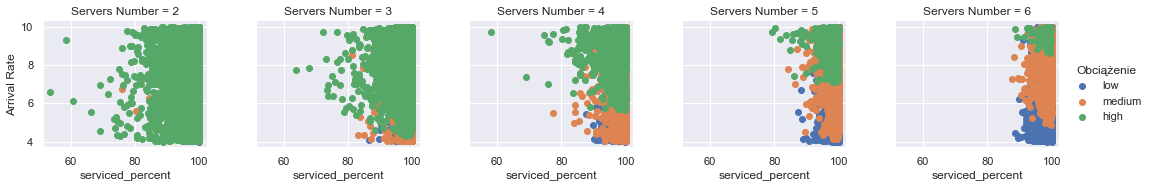

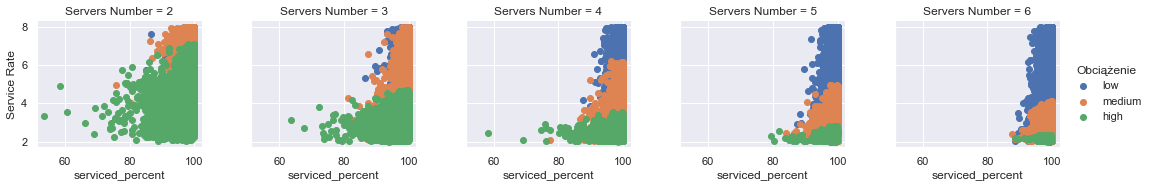

In [20]:
g = sns.FacetGrid(df, col='Servers Number', hue='load',
                  col_order=[i for i in range(2,7)], hue_order=['low', 'medium', 'high'])
g.map(plt.scatter, 'serviced_percent', 'Arrival Rate')
fig = g.fig
fig.subplots_adjust(wspace=0.3, top=0.8)
fig.suptitle("")
g.add_legend(title='Obciążenie')

g = sns.FacetGrid(df, col='Servers Number', hue='load',
                  col_order=[i for i in range(2,7)], hue_order=['low', 'medium', 'high'])
g.map(plt.scatter, 'serviced_percent', 'Service Rate')
fig = g.fig
fig.subplots_adjust(wspace=0.3, top=0.8)
fig.suptitle("")
g.add_legend(title='Obciążenie')

## Regresja
Do kolejnych wykresów wykorzystano dla czytelności wykorzystano dane dla jednej lilczby serwerów.
### Tempo napływu i obsługi przy różnych obciążeniach

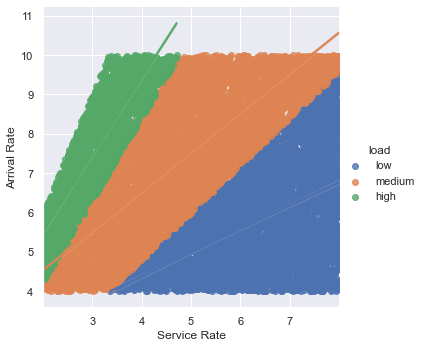

In [21]:
g = sns.lmplot(x='Service Rate', y='Arrival Rate', hue='load', data=db_prepared.loc[db_prepared['Servers Number'] == 3])

### Wpływ tempa napływu na obciążenie systemu

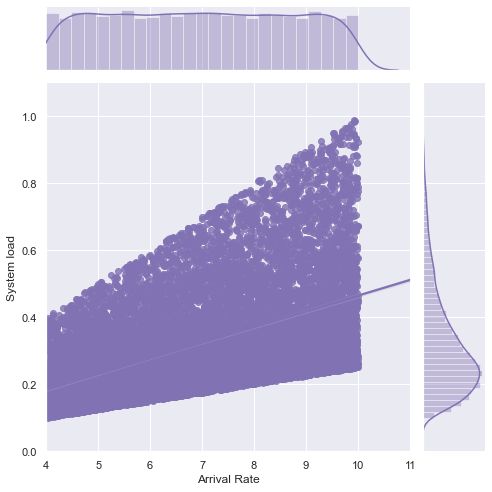

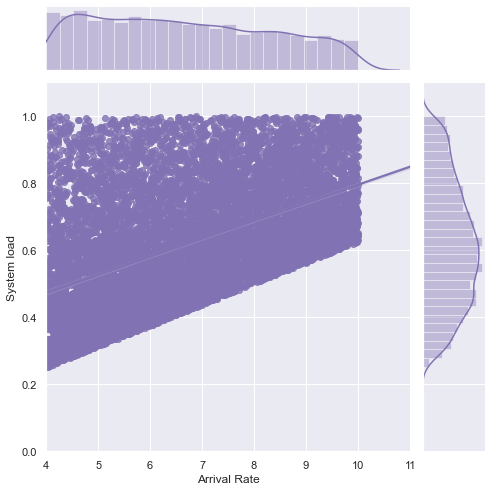

In [22]:
g = sns.jointplot("Arrival Rate", "System load", data=df.loc[df['Servers Number'] == 5],
                  kind="reg", truncate=False,
                  xlim=(4, 11), ylim=(0, 1.1),
                  color="m", height=7)
g = sns.jointplot("Arrival Rate", "System load", data=df.loc[df['Servers Number'] == 2],
                  kind="reg", truncate=False,
                  xlim=(4, 11), ylim=(0, 1.1),
                  color="m", height=7)

### Wpływ tempa obsługi na obciążenie systemu

13871


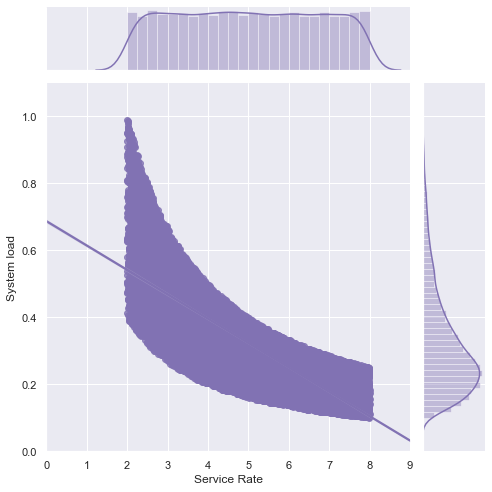

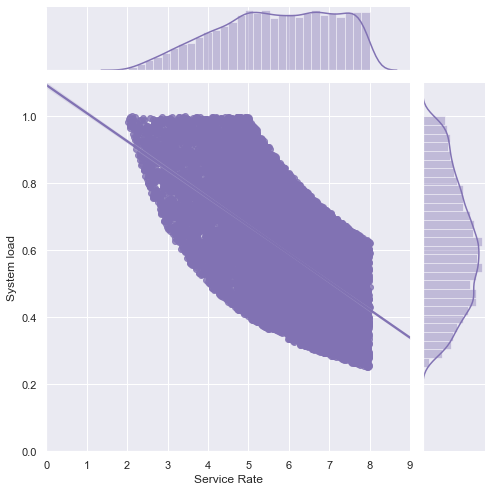

In [23]:
print(len(df.loc[df['Servers Number'] == 5]))
g = sns.jointplot("Service Rate", "System load", data=df.loc[df['Servers Number'] == 5],
                  kind="reg", truncate=False,
                  xlim=(0, 9), ylim=(0, 1.1),
                  color="m", height=7)
g = sns.jointplot("Service Rate", "System load", data=df.loc[df['Servers Number'] == 2],
                  kind="reg", truncate=False,
                  xlim=(0, 9), ylim=(0, 1.1),
                  color="m", height=7)

### Wpływ tempa obsługi/napływu na procentową wartość obsłużonych zgłoszeń

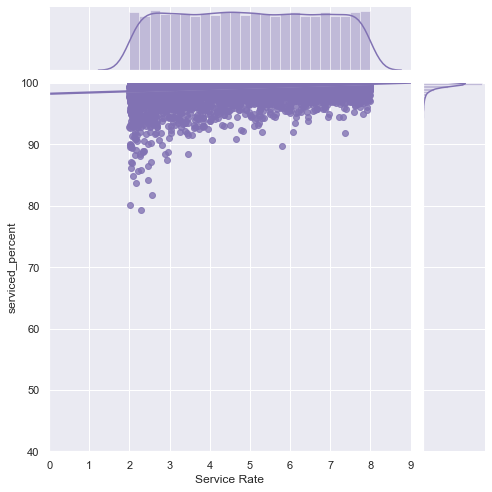

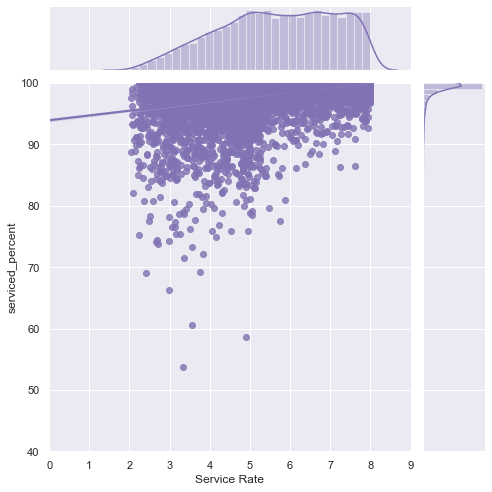

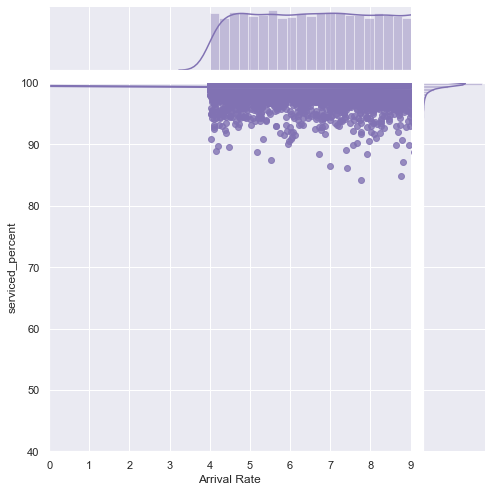

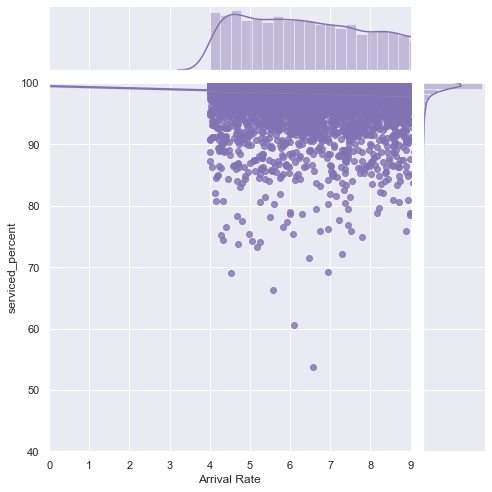

In [24]:
g = sns.jointplot("Service Rate", "serviced_percent", data=df.loc[df['Servers Number'] == 5],
                  kind="reg", truncate=False,
                  xlim=(0, 9), ylim=(40, 100),
                  color="m", height=7)
g = sns.jointplot("Service Rate", "serviced_percent", data=df.loc[df['Servers Number'] == 2],
                  kind="reg", truncate=False,
                  xlim=(0, 9), ylim=(40, 100),
                  color="m", height=7)
g = sns.jointplot("Arrival Rate", "serviced_percent", data=df.loc[df['Servers Number'] == 5],
                  kind="reg", truncate=False,
                  xlim=(0, 9), ylim=(40, 100),
                  color="m", height=7)
g = sns.jointplot("Arrival Rate", "serviced_percent", data=df.loc[df['Servers Number'] == 2],
                  kind="reg", truncate=False,
                  xlim=(0, 9), ylim=(40, 100),
                  color="m", height=7)

### Tempo napływu i obsługi a różnice między modelem matematycznym

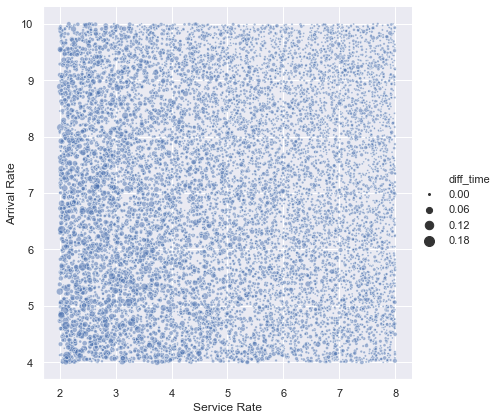

In [25]:
sns.relplot(x="Service Rate", y="Arrival Rate", size="diff_time",
            sizes=(4, 100), alpha=.5, palette="muted",
            height=6, data=df.loc[df['Servers Number'] == 5])

### Współczynnik regresji
Współczynnik regresji zmiennych tempa napływu, tempa obsługi, liczby serwerów do obciążenia systemu.

In [26]:
from sklearn import linear_model
X = df[['Service Rate', 'Arrival Rate', 'Servers Number']]
Y = df['System load']
regr = linear_model.LinearRegression()
regr.fit(X,Y)
print(f"Współczynnik regresji dla kolejno: tempa obsługi, tempa napływu, liczby serwerów: {regr.coef_} do obciążenia systemu")

Współczynnik regresji dla kolejno: tempa obsługi, tempa napływu, liczby serwerów: [-0.0800821   0.05309431 -0.10033944] do obciążenia systemu


In [27]:
from sklearn import linear_model
X = df[['Service Rate', 'Arrival Rate', 'Servers Number']]
Y = df['serviced_percent']
regr = linear_model.LinearRegression()
regr.fit(X,Y)
print(f"Współczynnik regresji dla kolejno: tempa obsługi, tempa napływu, liczby serwerów: {regr.coef_} do % wartości obsłużonych")

Współczynnik regresji dla kolejno: tempa obsługi, tempa napływu, liczby serwerów: [ 0.32850853 -0.09108102  0.27013396] do % wartości obsłużonych
